src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [245]:
import tensorflow as tf

In [246]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [247]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [248]:
import numpy as np
from matplotlib import pyplot as plt

In [249]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 2997 files belonging to 22 classes.


In [250]:
data_iterator = data.as_numpy_iterator()

In [251]:
batch = data_iterator.next()

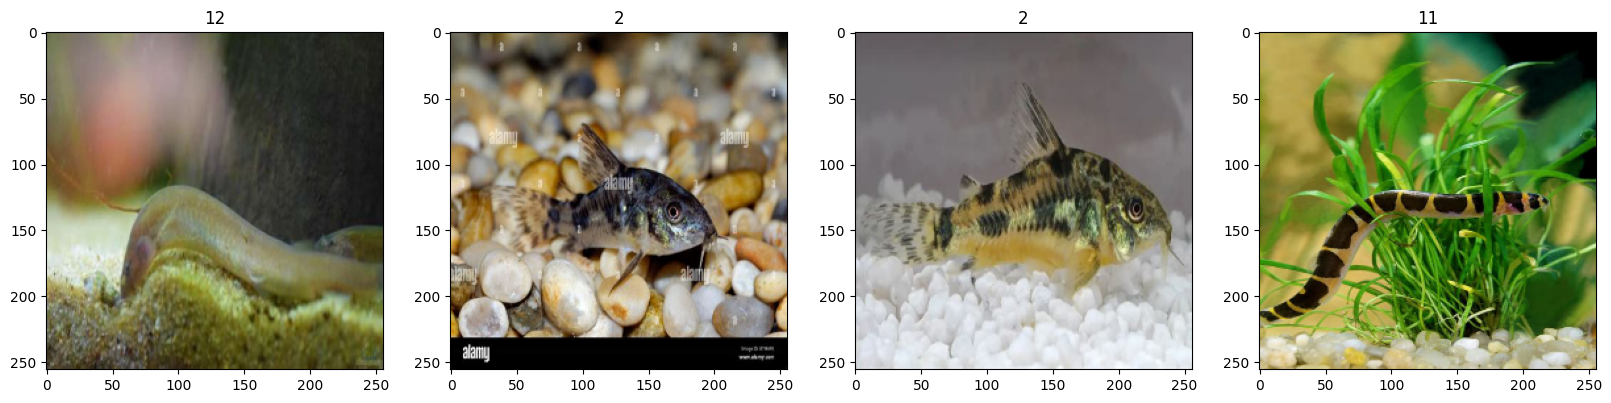

In [252]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [253]:
data = data.map(lambda x,y: (x/255, y))

In [254]:
data.as_numpy_iterator().next()

(array([[[[5.80935627e-02, 6.29708171e-01, 2.39977967e-02],
          [3.28608841e-01, 8.80481899e-01, 2.50288218e-01],
          [2.94874460e-01, 8.32765102e-01, 1.66783735e-01],
          ...,
          [1.59415126e-01, 8.17243278e-01, 1.19994819e-01],
          [1.07091866e-01, 8.19951177e-01, 1.83799237e-01],
          [1.11004099e-01, 8.59881699e-01, 2.63151050e-01]],
 
         [[1.34048492e-01, 6.84381366e-01, 9.31171179e-02],
          [3.44852567e-01, 8.72584939e-01, 2.74740070e-01],
          [2.39136875e-01, 7.54181981e-01, 1.34844378e-01],
          ...,
          [1.32429570e-01, 7.88432300e-01, 1.02238737e-01],
          [1.07310064e-01, 8.14335585e-01, 1.80076391e-01],
          [1.20235249e-01, 8.58483076e-01, 2.59987742e-01]],
 
         [[3.04948270e-01, 8.18478286e-01, 2.50963598e-01],
          [3.55758846e-01, 8.44691157e-01, 2.94557631e-01],
          [9.63059366e-02, 5.71840644e-01, 2.39086375e-02],
          ...,
          [1.13000788e-01, 7.61697233e-01, 9.0595

# Split Data

In [255]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [256]:
train_size

65

In [257]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [258]:
train_images = []
train_labels = []

In [259]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

In [260]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [261]:
val_images = []
val_labels = []

In [262]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([19,  2, 11,  4, 14,  3,  9,  3, 21,  7,  4,  2,  5,  7,  2,  4,  7,
        9,  2, 12, 11, 10, 19,  5,  3, 19,  7, 20,  5, 15, 13, 20],
      dtype=int32), array([ 2, 19,  7,  8,  7,  4, 20,  5, 21,  5, 11,  5,  5,  6,  2, 12,  1,
        4,  6,  6,  0,  5,  9,  9, 21, 19, 18,  8,  2,  9, 14,  4],
      dtype=int32), array([ 1,  0, 20,  7,  9,  0,  6,  5,  4,  1, 15, 21, 18, 12, 13,  8, 19,
       19, 15, 15,  2,  5, 14, 15, 16, 15, 19,  2, 15, 16, 16,  7],
      dtype=int32), array([ 4,  2, 10, 15, 21, 19, 14, 21, 16, 10,  9,  6, 11, 11,  0, 11,  7,
       21,  7, 17, 12,  9, 21,  2, 18, 17, 10, 20, 15, 12,  3, 10],
      dtype=int32), array([16, 18, 12, 12,  6, 15, 13, 15, 14, 10, 13, 14,  5, 13, 12,  7,  2,
       16,  5,  4, 13,  4,  6, 14, 19,  1, 11,  5, 12,  2, 20,  4],
      dtype=int32), array([19,  1, 14,  1, 10, 16, 10,  8, 12,  2,  7, 16, 17,  4, 17, 14, 18,
        7, 11, 12,  5,  8, 20,  5, 10, 12, 10, 12,  6, 16, 16,  1],
      dt

In [263]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [264]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [265]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [266]:
model = Sequential()

In [267]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

In [268]:
from tensorflow.keras.utils import to_categorical

In [269]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (2080, 256, 256, 3)
train_labels_one_hot shape: (2080, 22)
val_images shape: (576, 256, 256, 3)
val_labels_one_hot shape: (576, 22)


In [270]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [271]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [272]:
logdir='logs'

In [273]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [274]:
hist = model.fit(train_images, train_labels_one_hot, epochs=20,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 383ms/step - accuracy: 0.0613 - loss: 3.1273 - val_accuracy: 0.1181 - val_loss: 2.9923
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 380ms/step - accuracy: 0.1941 - loss: 2.7745 - val_accuracy: 0.2674 - val_loss: 2.4991
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 379ms/step - accuracy: 0.4050 - loss: 2.1060 - val_accuracy: 0.3767 - val_loss: 2.1981
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 379ms/step - accuracy: 0.6698 - loss: 1.1981 - val_accuracy: 0.3698 - val_loss: 2.3796
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 380ms/step - accuracy: 0.8188 - loss: 0.6554 - val_accuracy: 0.4236 - val_loss: 2.5451
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 383ms/step - accuracy: 0.9347 - loss: 0.2594 - val_accuracy: 0.4549 - val_loss: 2.9866
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 386ms/step - accuracy: 0.9621 - loss: 0.1769 - val_accuracy: 0.4688 - val_loss: 3.1253
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 383ms/step - accuracy: 0.9808 - loss: 0.0902 - val_accu

# Plot Performance

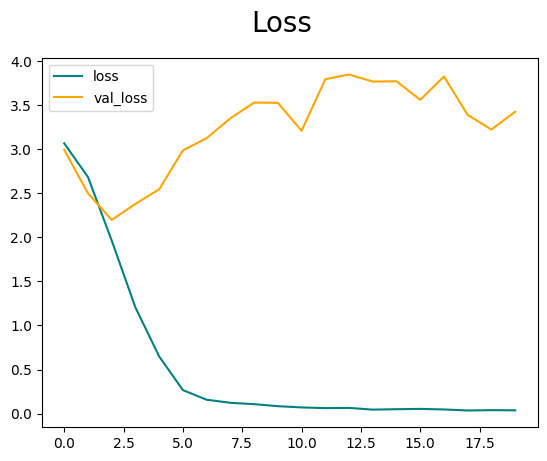

In [275]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

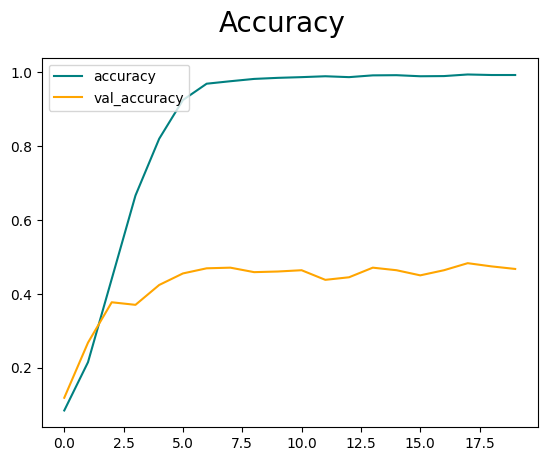

In [276]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [277]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [278]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [279]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Precision: 0.44672131538391113
Recall: 0.3784722089767456
Accuracy: 0.40625


# Test

In [280]:
import cv2

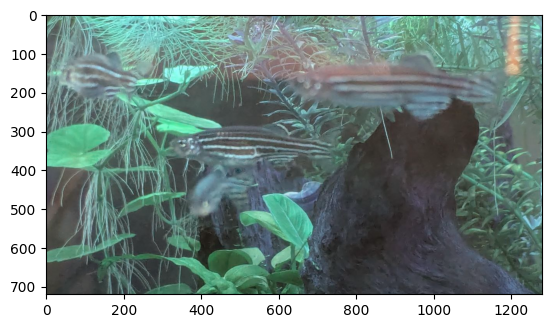

In [281]:
img = cv2.imread('test_pictures/Brachydanio.jpeg')
plt.imshow(img)
plt.show()

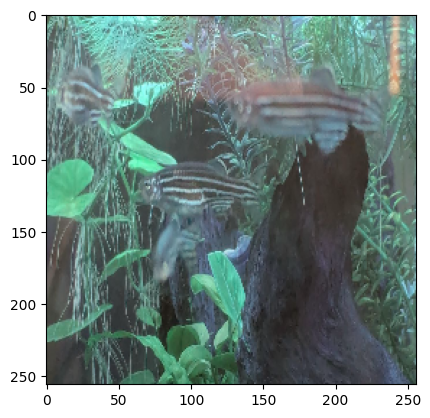

In [282]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [283]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [284]:
yhat

array([[1.5660176e-04, 3.5289622e-07, 1.0997158e-02, 1.0054089e-03,
        9.2926042e-05, 9.6403587e-01, 4.4279714e-06, 1.0115599e-02,
        2.4715916e-04, 2.5208044e-05, 5.4622047e-05, 2.4361118e-05,
        1.6950024e-04, 3.4773389e-03, 6.8608234e-03, 2.5949592e-05,
        1.5766114e-03, 6.5287802e-04, 4.1286206e-05, 4.2367968e-04,
        3.5526635e-09, 1.2264781e-05]], dtype=float32)

In [285]:
# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is: {class_names[predicted_class]}')

Predicted class is: Danio_rerio


# Save the Model